# Exploratory Data Analysis: datafun-06-eda

**Author:** Grace Tulsi  
**Date:** February 2026  
**Purpose:** Perform exploratory data analysis (EDA) on a dataset using Jupyter, pandas, and Seaborn.

## Dataset Description

**Dataset:** Students Performance in Exams  
**Source:** [Kaggle - Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams)  
**Records:** 1,000

| Column | Description | Type |
|--------|-------------|------|
| gender | Male or female | Categorical |
| race/ethnicity | Student group (A, B, C, D, E) | Categorical |
| parental level of education | Highest education level of parent | Categorical |
| lunch | Standard or free/reduced program | Categorical |
| test preparation course | Completed or none | Categorical |
| math score | Math exam score (0-100) | Numeric |
| reading score | Reading exam score (0-100) | Numeric |
| writing score | Writing exam score (0-100) | Numeric |

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Step 1: Data Acquisition

In [3]:
from pathlib import Path

# Load the dataset
df = pd.read_csv(Path("data/raw/StudentsPerformance.csv"))

# Inspect first rows
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Step 2: Initial Data Inspection

In [4]:
# Display first 10 rows
df.head(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


In [5]:
# Check the shape (rows, columns) and data types
print(f"Shape: {df.shape[0]} rows, {df.shape[1]} columns")
print()
print(df.dtypes)

Shape: 1000 rows, 8 columns

gender                           str
race/ethnicity                   str
parental level of education      str
lunch                            str
test preparation course          str
math score                     int64
reading score                  int64
writing score                  int64
dtype: object


### Check for Missing Values and Duplicates

In [6]:
# Check for missing values
print(df.isnull().sum())
print()

# Check for duplicate rows
print(f"Duplicate rows: {df.duplicated().sum()}")

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Duplicate rows: 0


## Step 3: Initial Descriptive Statistics

In [14]:
# Display summary statistics for numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


All three score columns have 1,000 entries with no missing values. Average scores are similar across subjects (math: 66, reading: 69, writing: 68). The standard deviations are around 15 for all three, indicating similar spread. Math has the lowest minimum score (0), while reading and writing minimums are higher (17 and 10).

In [15]:
# Describe only categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category', 'string']).columns
df[categorical_cols].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


### Observations: Categorical Summary

The categorical summary shows five non-numeric columns, each with 1,000 complete entries (no missing values).

- **gender** has 2 unique values, with female as the most frequent (518 of 1,000).
- **race/ethnicity** has 5 groups, with group C being the largest at 319 students.
- **parental level of education** is the most varied, with 6 unique levels. "Some college" is the most common (226).
- **lunch** has 2 categories, with "standard" as the majority (645), meaning most students were not on the free/reduced lunch program.
- **test preparation course** has 2 categories, and most students (642) did not complete a prep course.

These distributions suggest the dataset is slightly skewed toward female students and heavily skewed toward students who did not take a test preparation course. This will be worth exploring further when comparing scores across groups.

## Step 4: Initial Data Distribution for Numerical Columns

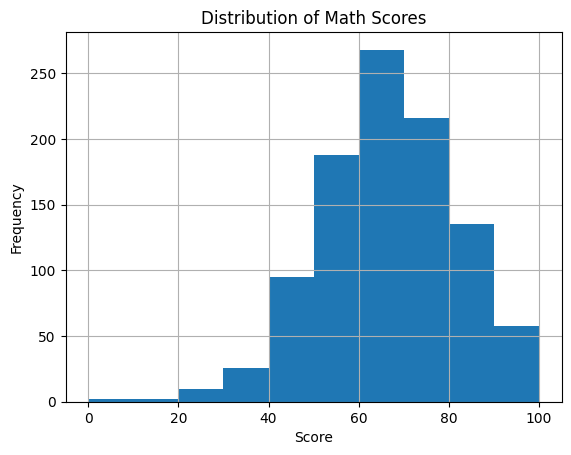

In [9]:
# Inspect histogram by numerical column
df['math score'].hist()
plt.title('Distribution of Math Scores')
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.show()

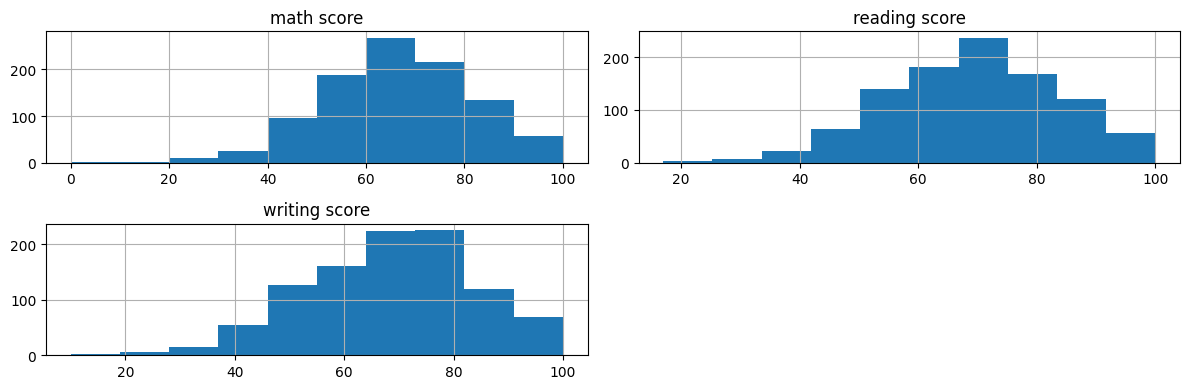

In [10]:
# Inspect histograms for all numerical columns
df.hist(figsize=(12, 4))
plt.tight_layout()
plt.show()

All three score distributions are roughly normal, centered around 60-80. Math scores have a slight left skew with a few students scoring near 0. Reading and writing scores show similar patterns with slightly higher concentrations in the 70-80 range.

## Step 5. Initial Data Distribution for Categorical Columns

In [16]:
# Inspect value counts for a specific categorical column
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

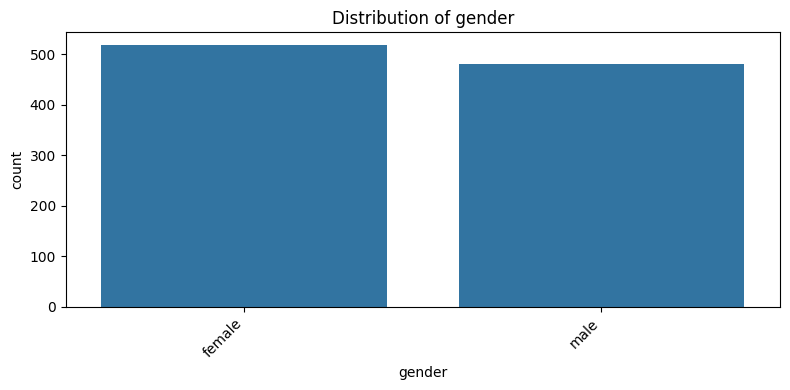

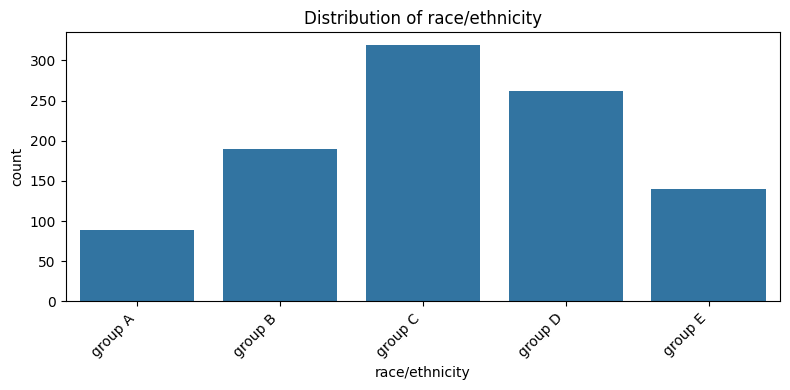

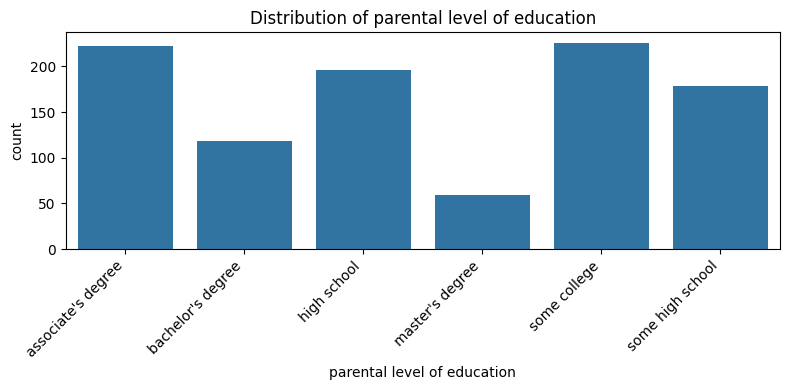

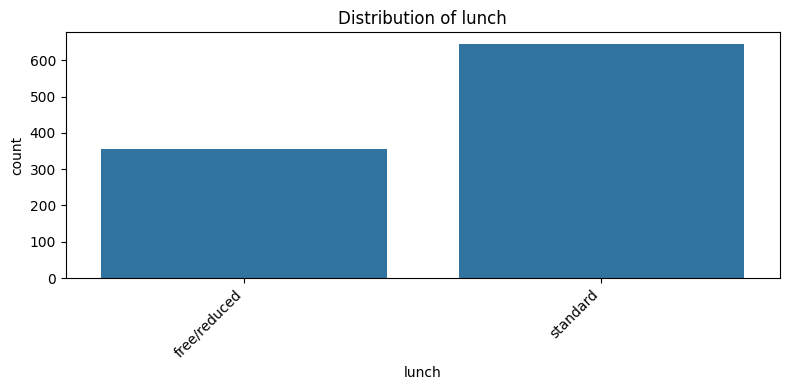

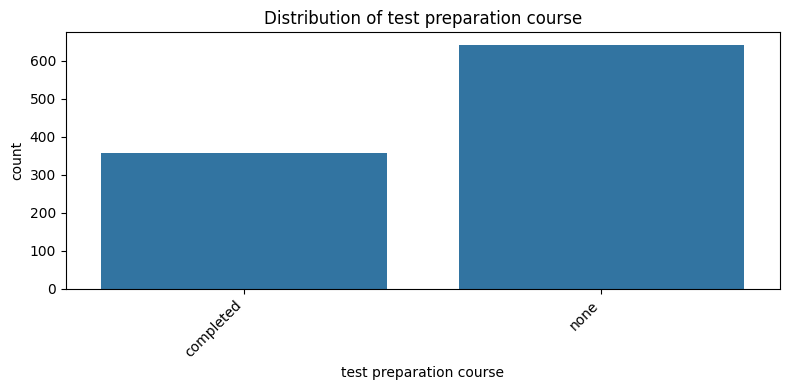

In [20]:
# Inspect value counts for all categorical columns
for col in df.select_dtypes(include=['object', 'category', 'string']).columns:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, order=sorted(df[col].unique()))
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Show all plots
plt.show()

### Observations: Categorical Distributions

- **gender** is fairly balanced, with a slight majority of female students (518 vs. 482 male).
- **race/ethnicity** is unevenly distributed. Group C is the largest (~319), followed by group D (~262). Group A is the smallest with fewer than 100 students.
- **parental level of education** varies across six levels. "Some college" and "associate's degree" are the most common, while "master's degree" is the least represented (~59). Most parents in the dataset did not complete a four-year degree.
- **lunch** is skewed toward "standard" (645), meaning most students were not on the free/reduced lunch program.
- **test preparation course** is also skewed — nearly two-thirds of students (642) did not complete a prep course. This could be worth exploring further to see if completing the course is associated with higher scores.

## Step 6: Initial Data Transformation and Feature Engineering

Renamed all columns to clean snake_case for consistency and easier referencing. Shortened longer names like "test preparation course" to "test_prep" and "parental level of education" to "parent_ed." Added a new "average_score" column that calculates the mean of each student's math, reading, and writing scores, providing a single overall performance metric for analysis.

In [23]:
# Rename columns to clean snake_case
df.rename(columns={
    'test preparation course': 'test_prep',
    'race/ethnicity': 'race_ethnicity',
    'parental level of education': 'parent_ed',
    'math score': 'math_score',
    'reading score': 'reading_score',
    'writing score': 'writing_score'
}, inplace=True)

# Add average score column
df['average_score'] = df[['math_score', 'reading_score', 'writing_score']].mean(axis=1).round(2)

# Verify changes
df.head()

,gender,race_ethnicity,parent_ed,lunch,test_prep,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67
1,female,group C,some college,standard,completed,69,90,88,82.33
2,female,group B,master's degree,standard,none,90,95,93,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33
4,male,group C,some college,standard,none,76,78,75,76.33
